<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_NCSA_Seaside_Building_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Update Seaside Building Inventory
The Seaside Building inventory needs to have the required attribute columns based on IN-CORE standards.

The inventory needs to be in a shapefile format.

The inventory needs to include the strcture id from the Address Point Invenotry for the Housing Unit Allocation algorithms.



In [3]:
import pandas as pd   # Pandas for data frame manipulation
import geopandas as gpd # For reading in shapefiles
import numpy as np # For filling in missing values
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

In [4]:
from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

In [5]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 01:53:57) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.2.3
numpy version:  1.20.1


In [6]:
# Check working directory - good practice for relative path access
os.getcwd()

'C:\\Users\\TarunAdluri\\Desktop\\Thesis\\SeasideData\\INCOREPRESENTATION\\INCORE\\Buldings\\IN-CORE_notebooks'

In [7]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache()

Enter username: tarunadluri
Enter password: ········
Connection successful to IN-CORE services. pyIncore version detected: 0.9.0


In [8]:
# create data_service object for loading files
data_service = DataService(client)

In [9]:
# Seaside BUilding Inventory Version 5
bldg_inv_id = '5df40388b9219c06cf8b0c80'
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\TarunAdluri\.incore\cache_data\5df40388b9219c06cf8b0c80\seaside_bldg\seaside_bldg.shp


In [10]:
gdf = bldg_inv.get_dataframe_from_shapefile()
gdf.head()

,geometry,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,...,occ_typ2,tract_id,guid,FID_NEW,origin,stat_class,rmv_improv,rmv_land,elev,period
0,POINT (-123.90900 46.01433),None,None,None,W1,None,1968,1,None,None,...,None,None,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,5783,1,193,0.0,0.0,-1.037119,0.35
1,POINT (-123.90585 45.99795),None,None,None,W1,None,1992,1,None,None,...,None,None,65d6e370-c05b-4b2f-bd17-d914d1d056c7,5782,1,193,0.0,0.0,-14.826966,0.35
2,POINT (-123.90900 46.01433),None,None,None,W1,None,1974,1,None,None,...,None,None,dad76485-9694-409e-ac7f-c64c7bd5c32c,5781,1,191,0.0,0.0,-1.037119,0.35
3,POINT (-123.90900 46.01433),None,None,None,W1,None,1984,1,None,None,...,None,None,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,5780,1,193,0.0,0.0,-1.037119,0.35
4,POINT (-123.91183 45.99747),None,None,None,W1,None,1964,1,None,None,...,None,None,929f1040-6224-409d-b4e3-58946daf3b91,5779,1,190,0.0,0.0,-1.729172,0.35


## Add link between Address Point Inventory and Building Inventory
In order for the Housing Unit Allocation link to the Building Inventory is the structure id.

Structure ID is a critical variable that links the building inventory with the address point inventory.

In [11]:
# reading in Nathanael's building inventory - this version of the building inventory has structure id
bldg_inv_id_v2 = '5d5433edb9219c0689b98344'
dataset = Dataset.from_data_service(bldg_inv_id_v2, data_service)
filename = dataset.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\TarunAdluri\.incore\cache_data\5d5433edb9219c0689b98344\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_buildinginventory\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_buildinginventory.csv


In [12]:
df = dataset.get_dataframe_from_csv()
df.head()

,strctid,blockid,parcelid,huestimate,x,y,landuse,guid,d_sf,insignific,moderate,heavy,complete
0,41007000000020005S,410079511001025,0,1,-123.900452,46.010494,422,d1efcbda-33ed-4e2f-ada9-103289097787,1,0.007564,0.220722,0.495246,0.276469
1,41007000000020009S,410079511003005,0,1,-123.932060,45.979836,900,1664a263-f670-4485-8fa2-fb8c77030b3a,1,0.008840,0.175102,0.532891,0.283167
2,41007020802001001S,410079507002020,20802,1,-123.918625,46.017567,142,04819c03-9e77-4a0e-96b7-5f9ef5067351,1,0.166990,0.496775,0.301215,0.035020
3,41007020853008001S,410079507002040,20853,1,-123.913643,46.017326,122,26c7457d-e252-40a7-a5db-5091cb9a6fe8,1,0.169053,0.497704,0.298854,0.034390
4,41007020853008002S,410079507002040,20853,1,-123.913643,46.017326,123,d0bbb5b2-8465-47f0-9ea4-51d7493e4c99,1,0.169053,0.497704,0.298854,0.034390


In [13]:
# merging Nathanael's building inventory CSV with OSU's shapefile
gdf_new = pd.merge(gdf, df[['strctid', 'guid','x','y']], how='left', left_on='guid', right_on='guid')
print(len(df), len(gdf), len(gdf_new)) # checking lengths

3687 4679 4679


In [14]:
gdf_new.guid.describe()

count                                     4679
unique                                    4679
top       1fd6aa80-1100-44b5-9c42-db80e27ecf94
freq                                         1
Name: guid, dtype: object

In [15]:
gdf_new.strctid.describe()

count                   3687
unique                  3687
top       41007024421002002S
freq                       1
Name: strctid, dtype: object

## Confirm Structure ID merge location matches geometry

In [16]:
gdf_new[['strctid', 'guid','x','y','geometry']].head()

,strctid,guid,x,y,geometry
0,41007020933038031S,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,-123.908997,46.014336,POINT (-123.90900 46.01433)
1,41007022416079053S,65d6e370-c05b-4b2f-bd17-d914d1d056c7,-123.905846,45.997948,POINT (-123.90585 45.99795)
2,41007020933038014S,dad76485-9694-409e-ac7f-c64c7bd5c32c,-123.908997,46.014336,POINT (-123.90900 46.01433)
3,41007020933038018S,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,-123.908997,46.014336,POINT (-123.90900 46.01433)
4,41007022789002002S,929f1040-6224-409d-b4e3-58946daf3b91,-123.911827,45.997475,POINT (-123.91183 45.99747)


In [17]:
gdf_new.columns

Index(['geometry', 'parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'FID_NEW', 'origin',
       'stat_class', 'rmv_improv', 'rmv_land', 'elev', 'period', 'strctid',
       'x', 'y'],
      dtype='object')

### Check to make sure structure id is unique and non missing

Future building inventories will link to the address point inventory with the guid. In the case of the inventory the missing values for strctid cause an error in the housing unit allocation. The next steps will fill in the missing values with the guid. The address point inventory needs to be updated to have the GUID in future versions.

In [18]:
gdf_new['strctid'].describe()

count                   3687
unique                  3687
top       41007024421002002S
freq                       1
Name: strctid, dtype: object

In [19]:
gdf_new['strctid'].isna().sum()

992

In [20]:
gdf_new.loc[gdf_new['strctid'].isna(), 'strctid'] = gdf_new['guid']

In [21]:
gdf_new['strctid'].describe()

count                                     4679
unique                                    4679
top       1fd6aa80-1100-44b5-9c42-db80e27ecf94
freq                                         1
Name: strctid, dtype: object

In [22]:
gdf_new['strctid'].isna().sum()

0

# Clean mereged data to match 

The latest Building Inventory of a shape file is of version 6, we use the type
ergo:buildingInventoryVer6 

https://opensource.ncsa.illinois.edu/confluence/display/INCORE1/Building+Inventory+Datatype+Schema

Variables to include
v6
guid

strctid 

struct_typ

archetype

occ_type

appr_bldg

sq_foot

dwell_unit

no_stories

cont_val

str_typ2

efacility

parid

year_built

a_stories

b_stories

bsmt_type

gsq_foot

occ_detail

major_occ

broad_occ

repl_cst

str_cst

nstra_cst

nstrd_cst

dgn_lvl

occ_typ2

appr_land

appr_tot



In [23]:
# create list of all required ergo:buildingInventoryVer6 columns
incore_columns = ['guid',
                  'strctid',
                  'struct_typ', 
                  'archetype', 
                  'occ_type', 
                  'appr_bldg', 
                  'sq_foot', 
                  'dwell_unit', 
                  'no_stories', 
                  'cont_val', 
                  'str_typ2', 
                  'efacility', 
                  'parid', 
                  'year_built', 
                  'a_stories', 
                  'b_stories', 
                  'bsmt_type', 
                  'gsq_foot', 
                  'occ_detail', 
                  'major_occ', 
                  'broad_occ', 
                  'repl_cst', 
                  'str_cst', 
                  'nstra_cst', 
                  'nstrd_cst', 
                  'dgn_lvl', 
                  'occ_typ2', 
                  'appr_land', 
                  'appr_tot']
incore_columns_df = pd.Series(incore_columns,name='varname')
incore_columns_df = pd.DataFrame(incore_columns,columns =['varname']).sort_values(by=['varname'])
incore_columns_df.head()

,varname
14,a_stories
5,appr_bldg
27,appr_land
28,appr_tot
3,archetype


### Compare IN-CORE Column list with Current list

In [24]:
columnlist = pd.DataFrame(gdf_new.columns,columns =['varname']).sort_values(by=['varname'])
columnlist.head()

,varname
30,FID_NEW
8,a_stories
17,appr_bldg
9,b_stories
3,bldg_id


In [25]:
columnlist_merge = columnlist.merge(incore_columns_df, how='outer', left_on='varname', right_on='varname', indicator = True)
columnlist_merge

,varname,_merge
0,FID_NEW,left_only
1,a_stories,both
2,appr_bldg,both
3,b_stories,both
4,bldg_id,left_only
5,broad_occ,both
6,bsmt_type,both
7,cont_val,both
8,dgn_lvl,both
9,dwell_unit,both


In [26]:
left_only_cols = columnlist_merge.loc[columnlist_merge['_merge'] == 'left_only']
left_only_cols

,varname,_merge
0,FID_NEW,left_only
4,bldg_id,left_only
11,elev,left_only
12,geometry,left_only
22,origin,left_only
24,parid_card,left_only
25,period,left_only
27,rmv_improv,left_only
28,rmv_land,left_only
30,stat_class,left_only


In [27]:
right_only_cols = columnlist_merge.loc[columnlist_merge['_merge'] == 'right_only']
right_only_cols

,varname,_merge
40,appr_land,right_only
41,appr_tot,right_only
42,archetype,right_only


In [28]:
explore_columns = left_only_cols.varname.to_list()
explore_columns

['FID_NEW',
 'bldg_id',
 'elev',
 'geometry',
 'origin',
 'parid_card',
 'period',
 'rmv_improv',
 'rmv_land',
 'stat_class',
 'str_prob',
 'tract_id',
 'x',
 'y']

In [29]:
gdf_new[explore_columns].head()

,FID_NEW,bldg_id,elev,geometry,origin,parid_card,period,rmv_improv,rmv_land,stat_class,str_prob,tract_id,x,y
0,5783,None,-1.037119,POINT (-123.90900 46.01433),1,None,0.35,0.0,0.0,193,None,None,-123.908997,46.014336
1,5782,None,-14.826966,POINT (-123.90585 45.99795),1,None,0.35,0.0,0.0,193,None,None,-123.905846,45.997948
2,5781,None,-1.037119,POINT (-123.90900 46.01433),1,None,0.35,0.0,0.0,191,None,None,-123.908997,46.014336
3,5780,None,-1.037119,POINT (-123.90900 46.01433),1,None,0.35,0.0,0.0,193,None,None,-123.908997,46.014336
4,5779,None,-1.729172,POINT (-123.91183 45.99747),1,None,0.35,0.0,0.0,190,None,None,-123.911827,45.997475


In [30]:
gdf_new.elev.describe()

count    4679.000000
mean       -4.117446
std         3.774860
min       -14.997761
25%        -4.181592
50%        -3.151248
75%        -2.119257
max         1.690376
Name: elev, dtype: float64

In [31]:
gdf_new.origin.describe()

count     4679
unique       2
top          1
freq      4677
Name: origin, dtype: object

In [32]:
gdf_new.parid_card.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: parid_card, dtype: object

In [33]:
gdf_new.period.describe()

count    4679.000000
mean        0.446516
std         0.156745
min         0.350000
25%         0.350000
50%         0.350000
75%         0.400000
max         0.750000
Name: period, dtype: float64

## Harmonize Building Value Variables

In [34]:
gdf_new.rmv_improv.describe()

count    4.679000e+03
mean     1.749143e+05
std      4.824592e+05
min      0.000000e+00
25%      6.624350e+04
50%      1.131320e+05
75%      1.926190e+05
max      1.769744e+07
Name: rmv_improv, dtype: float64

In [35]:
gdf_new.rmv_land.describe()

count    4.679000e+03
mean     1.449074e+05
std      2.646332e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.005870e+05
75%      1.546440e+05
max      6.453285e+06
Name: rmv_land, dtype: float64

In [36]:
gdf_new.appr_bldg.describe()

count       4679
unique      3913
top       121253
freq          42
Name: appr_bldg, dtype: object

In [37]:
gdf_new.appr_bldg = gdf_new.appr_bldg.astype(int)

In [38]:
gdf_new.appr_bldg.describe()

count    4.679000e+03
mean     3.208858e+05
std      6.428265e+05
min      0.000000e+00
25%      1.572930e+05
50%      2.245680e+05
75%      3.179700e+05
max      1.901118e+07
Name: appr_bldg, dtype: float64

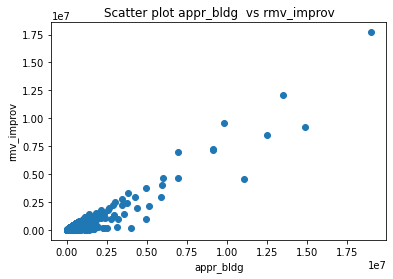

In [39]:
import matplotlib.pyplot as plt
# Scatter Plot
plt.scatter(gdf_new['appr_bldg'], gdf_new['rmv_improv'])
plt.title('Scatter plot appr_bldg  vs rmv_improv')
plt.xlabel('appr_bldg')
plt.ylabel('rmv_improv')
plt.show()

In [40]:
# Correlation
gdf_new[['appr_bldg','rmv_improv']].corr()

,appr_bldg,rmv_improv
appr_bldg,1.000000,0.928989
rmv_improv,0.928989,1.000000


In [41]:
gdf_new[['rmv_improv','appr_bldg']].corr()

,rmv_improv,appr_bldg
rmv_improv,1.000000,0.928989
appr_bldg,0.928989,1.000000


In [42]:
gdf_new['value_match'] = 0
gdf_new.loc[(gdf_new['rmv_improv'] == gdf_new['appr_bldg']), 'value_match'] = 1
gdf_new['value_match'].describe()

count    4679.000000
mean        0.223979
std         0.416953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: value_match, dtype: float64

## Harmonize Occupancy Type
Broad HAZUS Occupancy Category (e.g. RES3 - multi-family residential)

In [43]:
gdf_new.occ_type.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: occ_type, dtype: object

In [44]:
gdf_new.occ_typ2.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: occ_typ2, dtype: object

In [45]:
gdf_new.occ_detail.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: occ_detail, dtype: object

In [46]:
gdf_new.stat_class.describe()

count     4679
unique     126
top        900
freq       899
Name: stat_class, dtype: object

### Check the Coordinate Reference System

In [47]:
type(gdf_new.crs)

NoneType

In [48]:
gdf_new.crs

In [49]:
gdf_new['geometry'].head()

0    POINT (-123.90900 46.01433)
1    POINT (-123.90585 45.99795)
2    POINT (-123.90900 46.01433)
3    POINT (-123.90900 46.01433)
4    POINT (-123.91183 45.99747)
Name: geometry, dtype: geometry

In [50]:
gdf_new.crs = "EPSG:4269"
gdf_new['geometry'].head()

0    POINT (-123.90900 46.01433)
1    POINT (-123.90585 45.99795)
2    POINT (-123.90900 46.01433)
3    POINT (-123.90900 46.01433)
4    POINT (-123.91183 45.99747)
Name: geometry, dtype: geometry

In [51]:
gdf_new.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

### Save as Shapefile

In [53]:
gdf_new.to_file("IN-CORE_Seaside_BuildingInventory_2021-03-20.shp")